### Problem Statement¶

### Merging the given 2 datsets

In [2]:
import pandas as pd
# Load the datasets
labels_df = pd.read_csv("labels.csv")
values_df = pd.read_csv("values.csv")

# Merge the datasets on 'patient_id'
data = pd.merge(values_df, labels_df, on="patient_id", how="inner")

# Save the merged dataset to a new CSV file
data.to_csv("merged_heart_disease_data.csv", index=False)

In [4]:
data

patient_id  slope_of_peak_exercise_st_segment               thal  \
0       0z64un                                  1             normal   
1       ryoo3j                                  2             normal   
2       yt1s1x                                  1             normal   
3       l2xjde                                  1  reversible_defect   
4       oyt4ek                                  3  reversible_defect   
..         ...                                ...                ...   
175     5qfar3                                  2  reversible_defect   
176     2s2b1f                                  2             normal   
177     nsd00i                                  2  reversible_defect   
178     0xw93k                                  1             normal   
179     2nx10r                                  1             normal   

     resting_blood_pressure  chest_pain_type  num_major_vessels  \
0                       128                2                  0   
1                       110                3                  0   
2                       125                4                  3   
3                       152                4                  0   
4                       178                1                  0   
..                      ...              ...                ...   
175                     125                4                  2   
176                     180                4                  0   
177                     125                3                  0   
178                     124                3                  2   
179                     160                3                  1   

     fasting_blood_sugar_gt_120_mg_per_dl  resting_ekg_results  \
0                                       0                    2   
1                                       0                    0   
2                                       0                    2   
3                                       0                    0   
4                                       0                    2   
..                                    ...                  ...   
175                                     1                    0   
176                                     0                    1   
177                                     0                    0   
178                                     1                    0   
179                                     0                    0   

     serum_cholesterol_mg_per_dl  oldpeak_eq_st_depression  sex  age  \
0                            308                       0.0    1   45   
1                            214                       1.6    0   54   
2                            304                       0.0    1   77   
3                            223                       0.0    1   40   
4                            270                       4.2    1   59   
..                           ...                       ...  ...  ...   
175                          254                       0.2    1   67   
176                          327                       3.4    0   55   
177                          309                       1.8    1   64   
178                          255                       0.0    1   48   
179                          201                       0.0    0   54   

     max_heart_rate_achieved  exercise_induced_angina  heart_disease_present  
0                        170                        0                      0  
1                        158                        0                      0  
2                        162                        1                      1  
3                        181                        0                      1  
4                        145                        0                      0  
..                       ...                      ...                    ...  
175                      163                        0                      1  
176                      117                

## Task 1:-Prepare a complete data analysis report on the given data.

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Domain Analysis

In [10]:
data.columns

Index(['patient_id', 'slope_of_peak_exercise_st_segment', 'thal',
       'resting_blood_pressure', 'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina',
       'heart_disease_present'],
      dtype='object')

### Basic Checks 

In [13]:
data.head()

patient_id  slope_of_peak_exercise_st_segment               thal  \
0     0z64un                                  1             normal   
1     ryoo3j                                  2             normal   
2     yt1s1x                                  1             normal   
3     l2xjde                                  1  reversible_defect   
4     oyt4ek                                  3  reversible_defect   

   resting_blood_pressure  chest_pain_type  num_major_vessels  \
0                     128                2                  0   
1                     110                3                  0   
2                     125                4                  3   
3                     152                4                  0   
4                     178                1                  0   

   fasting_blood_sugar_gt_120_mg_per_dl  resting_ekg_results  \
0                                     0                    2   
1                                     0                    0   
2                                     0                    2   
3                                     0                    0   
4                                     0                    2   

   serum_cholesterol_mg_per_dl  oldpeak_eq_st_depression  sex  age  \
0                          308                       0.0    1   45   
1                          214                       1.6    0   54   
2                          304                       0.0    1   77   
3                          223                       0.0    1   40   
4                          270                       4.2    1   59   

   max_heart_rate_achieved  exercise_induced_angina  heart_disease_present  
0                      170                        0                      0  
1                      158                        0                      0  
2                      162                        1                      1  
3                      181                        0                      1  
4                      145                        0                      0

In [15]:
data.tail()

patient_id  slope_of_peak_exercise_st_segment               thal  \
175     5qfar3                                  2  reversible_defect   
176     2s2b1f                                  2             normal   
177     nsd00i                                  2  reversible_defect   
178     0xw93k                                  1             normal   
179     2nx10r                                  1             normal   

     resting_blood_pressure  chest_pain_type  num_major_vessels  \
175                     125                4                  2   
176                     180                4                  0   
177                     125                3                  0   
178                     124                3                  2   
179                     160                3                  1   

     fasting_blood_sugar_gt_120_mg_per_dl  resting_ekg_results  \
175                                     1                    0   
176                                     0                    1   
177                                     0                    0   
178                                     1                    0   
179                                     0                    0   

     serum_cholesterol_mg_per_dl  oldpeak_eq_st_depression  sex  age  \
175                          254                       0.2    1   67   
176                          327                       3.4    0   55   
177                          309                       1.8    1   64   
178                          255                       0.0    1   48   
179                          201                       0.0    0   54   

     max_heart_rate_achieved  exercise_induced_angina  heart_disease_present  
175                      163                        0                      1  
176                      117                        1                      1  
177                      131                        1                      1  
178                      175                        0                      0  
179                      163                        0                      0

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   patient_id                            180 non-null    object 
 1   slope_of_peak_exercise_st_segment     180 non-null    int64  
 2   thal                                  180 non-null    object 
 3   resting_blood_pressure                180 non-null    int64  
 4   chest_pain_type                       180 non-null    int64  
 5   num_major_vessels                     180 non-null    int64  
 6   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 7   resting_ekg_results                   180 non-null    int64  
 8   serum_cholesterol_mg_per_dl           180 non-null    int64  
 9   oldpeak_eq_st_depression              180 non-null    float64
 10  sex                                   180 non-null    int64  
 11  age                

In [19]:
data.describe()

slope_of_peak_exercise_st_segment  resting_blood_pressure  \
count                         180.000000              180.000000   
mean                            1.550000              131.311111   
std                             0.618838               17.010443   
min                             1.000000               94.000000   
25%                             1.000000              120.000000   
50%                             1.000000              130.000000   
75%                             2.000000              140.000000   
max                             3.000000              180.000000   

       chest_pain_type  num_major_vessels  \
count       180.000000         180.000000   
mean          3.155556           0.694444   
std           0.938454           0.969347   
min           1.000000           0.000000   
25%           3.000000           0.000000   
50%           3.000000           0.000000   
75%           4.000000           1.000000   
max           4.000000           3.000000   

       fasting_blood_sugar_gt_120_mg_per_dl  resting_ekg_results  \
count                            180.000000           180.000000   
mean                               0.161111             1.050000   
std                                0.368659             0.998742   
min                                0.000000             0.000000   
25%                                0.000000             0.000000   
50%                                0.000000             2.000000   
75%                                0.000000             2.000000   
max                                1.000000             2.000000   

       serum_cholesterol_mg_per_dl  oldpeak_eq_st_depression         sex  \
count                   180.000000                180.000000  180.000000   
mean                    249.211111                  1.010000    0.688889   
std                      52.717969                  1.121357    0.464239   
min                     126.000000                  0.000000    0.000000   
25%                     213.750000                  0.000000    0.000000   
50%                     245.500000                  0.800000    1.000000   
75%                     281.250000                  1.600000    1.000000   
max                     564.000000                  6.200000    1.000000   

              age  max_heart_rate_achieved  exercise_induced_angina  \
count  180.000000               180.000000               180.000000   
mean    54.811111               149.483333                 0.316667   
std      9.334737                22.063513                 0.466474   
min     29.000000                96.000000                 0.000000   
25%     48.000000               132.000000                 0.000000   
50%     55.000000               152.000000                 0.000000   
75%     62.000000               166.250000                 1.000000   
max     77.000000               202.000000                 1.000000   

       heart_disease_present  
count             180.000000  
mean                0.444444  
std                 0.498290  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 1.000000  
max                 1.000000

In [21]:
data.describe(include='O')

patient_id    thal
count         180     180
unique        180       3
top        0z64un  normal
freq            1      98

In [23]:
duplicate_rows = data[data.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [patient_id, slope_of_peak_exercise_st_segment, thal, resting_blood_pressure, chest_pain_type, num_major_vessels, fasting_blood_sugar_gt_120_mg_per_dl, resting_ekg_results, serum_cholesterol_mg_per_dl, oldpeak_eq_st_depression, sex, age, max_heart_rate_achieved, exercise_induced_angina, heart_disease_present]
Index: []


### Data Cleaning

In [26]:
data.isnull().sum()  #By this we got to know there are no null values

patient_id                              0
slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
heart_disease_present                   0
dtype: int64

In [28]:
'''dropping patient_id column 
The patient_id column is a unique identifier for each patient, but it does not contain any medical or clinical information 
that can help predict heart disease, so we are dropping this'''
data=data.drop('patient_id',axis=1) 

In [30]:
data  #checking whether it is dropped or not

slope_of_peak_exercise_st_segment               thal  \
0                                    1             normal   
1                                    2             normal   
2                                    1             normal   
3                                    1  reversible_defect   
4                                    3  reversible_defect   
..                                 ...                ...   
175                                  2  reversible_defect   
176                                  2             normal   
177                                  2  reversible_defect   
178                                  1             normal   
179                                  1             normal   

     resting_blood_pressure  chest_pain_type  num_major_vessels  \
0                       128                2                  0   
1                       110                3                  0   
2                       125                4                  3   
3                       152                4                  0   
4                       178                1                  0   
..                      ...              ...                ...   
175                     125                4                  2   
176                     180                4                  0   
177                     125                3                  0   
178                     124                3                  2   
179                     160                3                  1   

     fasting_blood_sugar_gt_120_mg_per_dl  resting_ekg_results  \
0                                       0                    2   
1                                       0                    0   
2                                       0                    2   
3                                       0                    0   
4                                       0                    2   
..                                    ...                  ...   
175                                     1                    0   
176                                     0                    1   
177                                     0                    0   
178                                     1                    0   
179                                     0                    0   

     serum_cholesterol_mg_per_dl  oldpeak_eq_st_depression  sex  age  \
0                            308                       0.0    1   45   
1                            214                       1.6    0   54   
2                            304                       0.0    1   77   
3                            223                       0.0    1   40   
4                            270                       4.2    1   59   
..                           ...                       ...  ...  ...   
175                          254                       0.2    1   67   
176                          327                       3.4    0   55   
177                          309                       1.8    1   64   
178                          255                       0.0    1   48   
179                          201                       0.0    0   54   

     max_heart_rate_achieved  exercise_induced_angina  heart_disease_present  
0                        170                        0                      0  
1                        158                        0                      0  
2                        162                        1                      1  
3                        181                        0                      1  
4                        145                        0                      0  
..                       ...                      ...                    ...  
175                      163                        0                      1  
176                      117                        1                      1  
177                      131                        1                      1  
178                

### EDA

In [33]:
from ydata_profiling import ProfileReport

In [34]:
profile=ProfileReport(data,title="EDA",explorative=True)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

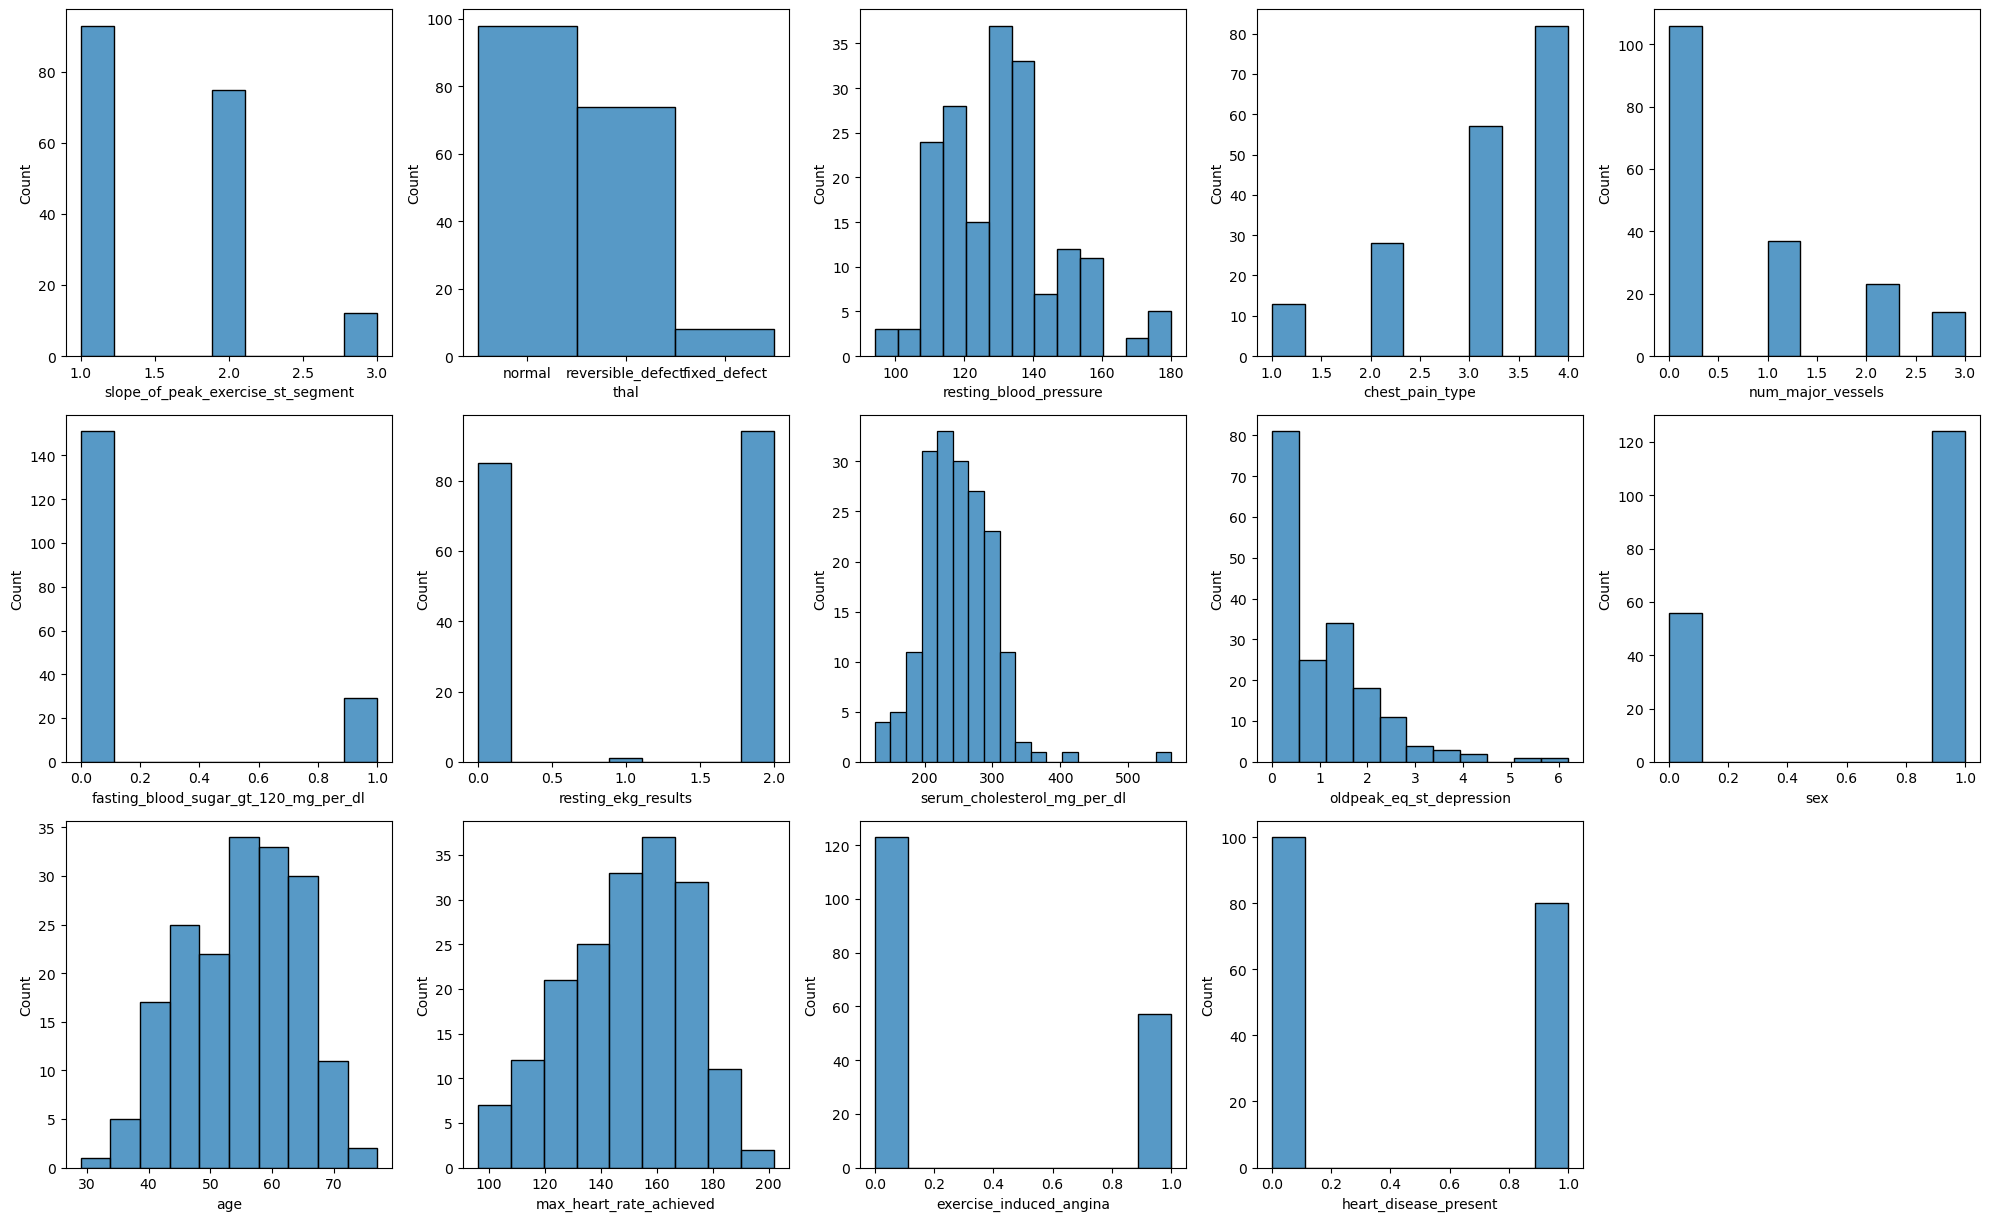

In [37]:
#Univariate analysis
plt.figure(figsize=(20,20))
plotnum=1
for column in data:
    plt.subplot(5,5,plotnum)
    sns.histplot(data[column])
    plotnum = plotnum+1
plt.tight_layout()
plt.show()

In [39]:
#Bivariate analysis
#analysing the input attributes with target output 'heart_disease_present'
#firstly seperating the numerical data and categorical data
data1 = data[['thal']]
data2 = data[['slope_of_peak_exercise_st_segment', 'resting_blood_pressure','chest_pain_type', 'num_major_vessels','fasting_blood_sugar_gt_120_mg_per_dl', 
              'resting_ekg_results','serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age','max_heart_rate_achieved', 'exercise_induced_angina']]
#Here data1 is categorical and data2 is numerical

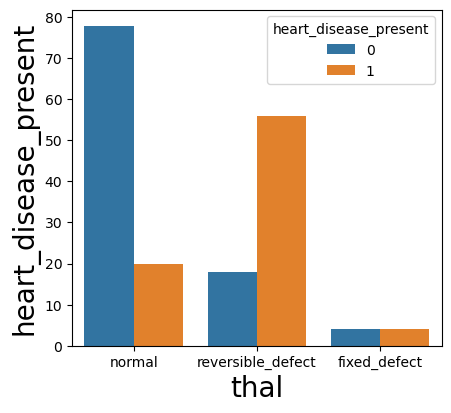

In [41]:
#analyzing data1 with our target variable 'heart_disease_present'
plt.figure(figsize=(20,20),facecolor='white') #To set canvas
plotnumber = 1 
for column in data1:
    if plotnumber<=20:   #here 20 is given based on number of columns and subplot size
        ax=plt.subplot(5,5,plotnumber)
        sns.countplot(x=data1[column], hue=data['heart_disease_present'])
        plt.xlabel(column,fontsize=20) 
        plt.ylabel('heart_disease_present',fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

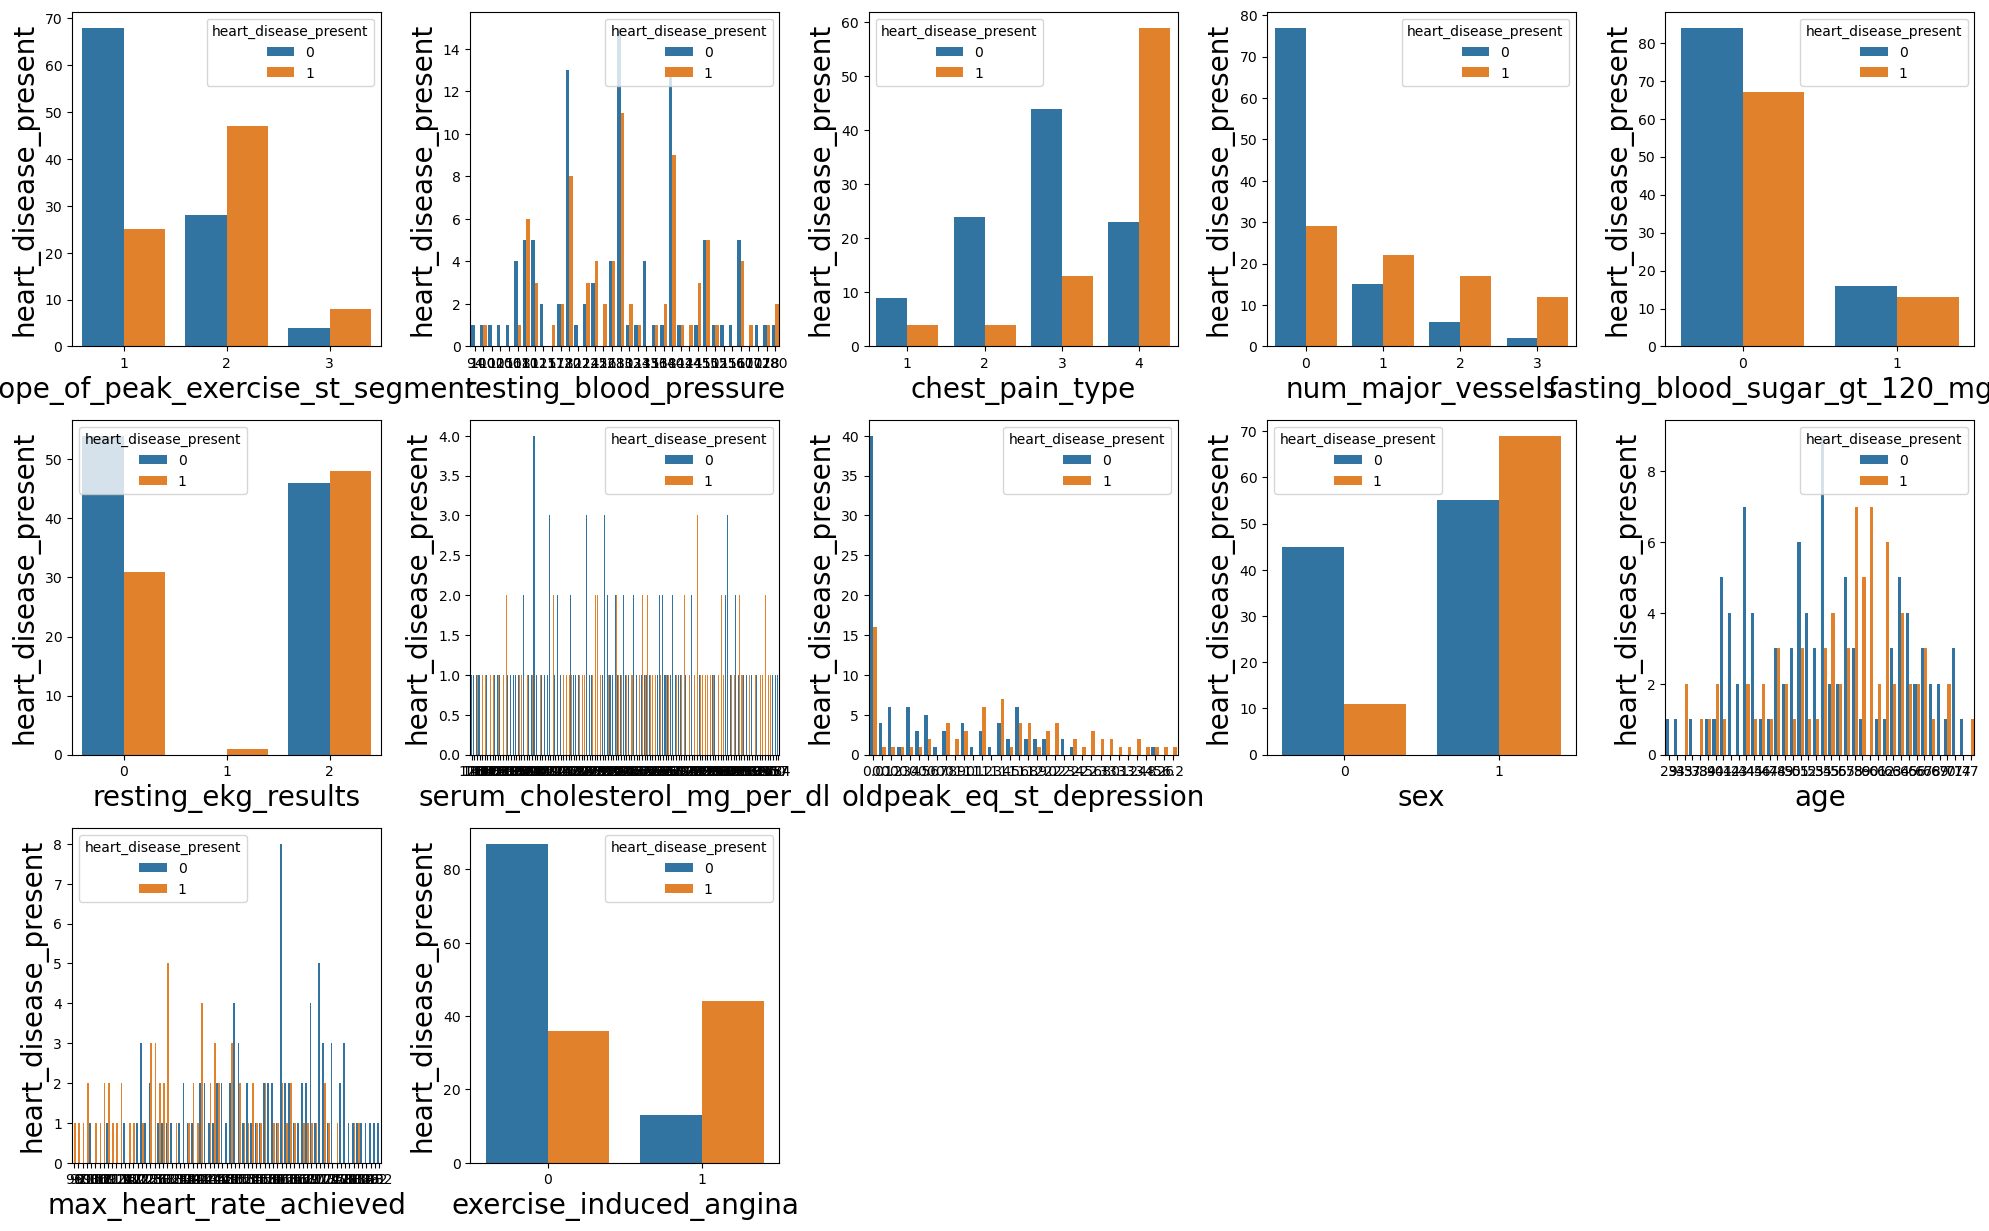

In [43]:
#analyzing data2 with our target variable 'heart_disease_present'
plt.figure(figsize=(20,20),facecolor='white') #To set canvas
plotnumber = 1 
for column in data2:
    if plotnumber<=20:   #here 20 is given based on number of columns and subplot size
        ax=plt.subplot(5,5,plotnumber)
        sns.countplot(x=data2[column],hue=data['heart_disease_present'])
        plt.xlabel(column,fontsize=20) 
        plt.ylabel('heart_disease_present',fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

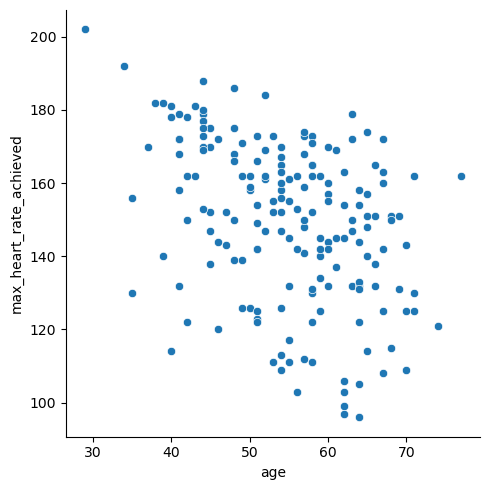

In [44]:
#Analyzing the relationships between input attributes
#`age` vs. `max_heart_rate_achieved`
#Does heart rate decline with age?
sns.relplot(x='age',y='max_heart_rate_achieved',data=data)
plt.show()

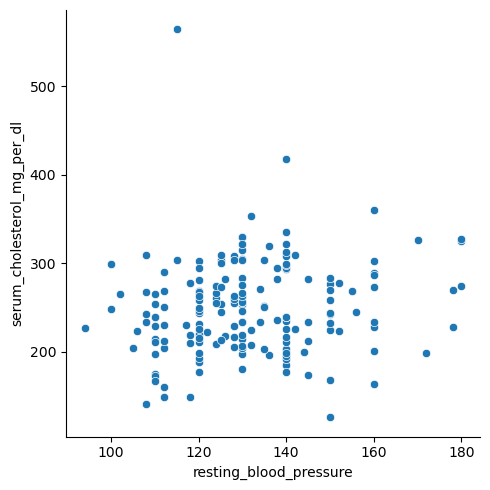

In [47]:
#`resting_blood_pressure` vs. `serum_cholesterol_mg_per_dl`
#Is high cholesterol linked to high blood pressure?
sns.relplot(x='resting_blood_pressure',y='serum_cholesterol_mg_per_dl',data=data)
plt.show()

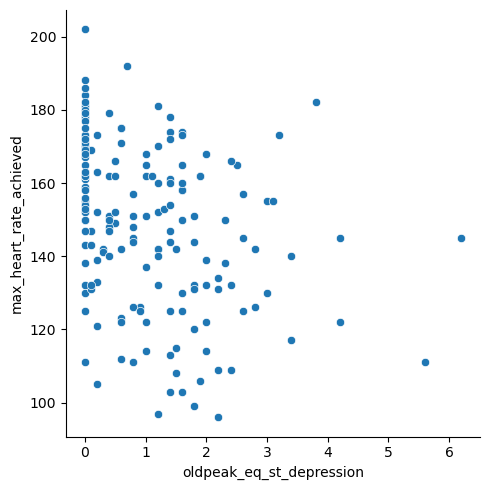

In [49]:
#`oldpeak_eq_st_depression` vs. `max_heart_rate_achieved`
#Does ST depression increase with lower heart rate?
sns.relplot(x='oldpeak_eq_st_depression',y='max_heart_rate_achieved',data=data)
plt.show()

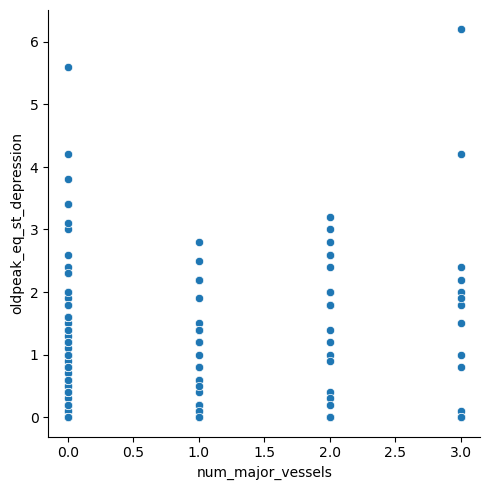

In [51]:
#`num_major_vessels` vs. `oldpeak_eq_st_depression`
#Do blocked vessels affect ST depression levels? 
sns.relplot(x='num_major_vessels',y='oldpeak_eq_st_depression',data=data)
plt.show()

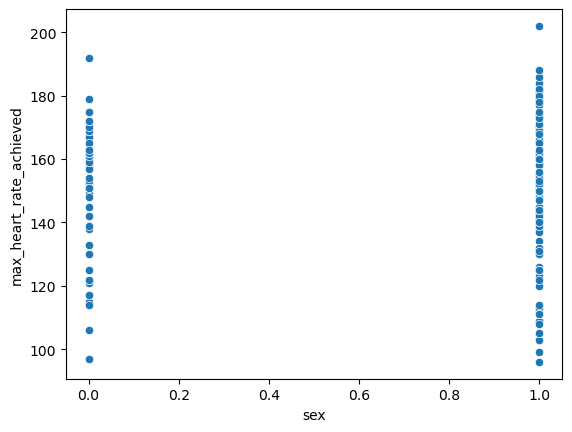

In [53]:
#`sex` vs. `max_heart_rate_achieved`
# Do men and women have different max heart rates?
sns.scatterplot(x='sex',y='max_heart_rate_achieved',data=data)
plt.show()

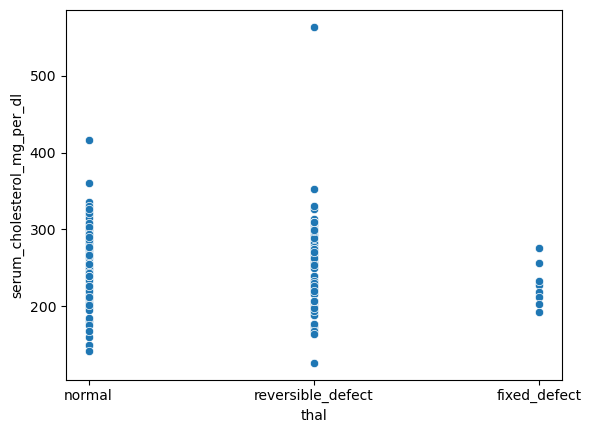

In [55]:
#`thal` vs. `serum_cholesterol_mg_per_dl`
# Do different Thallium test results correlate with cholesterol levels?
sns.scatterplot(x='thal',y='serum_cholesterol_mg_per_dl',data=data)
plt.show()

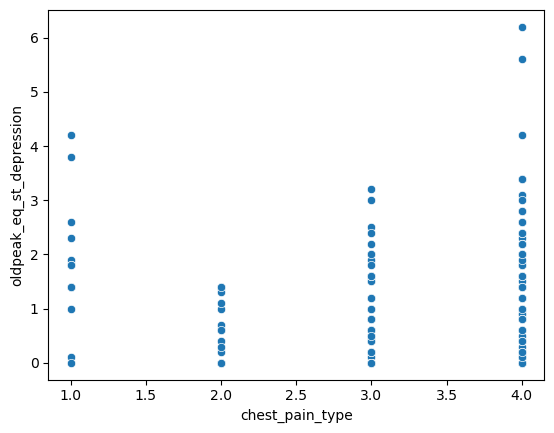

In [57]:
#`chest_pain_type` vs. `oldpeak_eq_st_depression`
#Do specific chest pain types relate to ST depression?
sns.scatterplot(x='chest_pain_type',y='oldpeak_eq_st_depression',data=data)
plt.show()

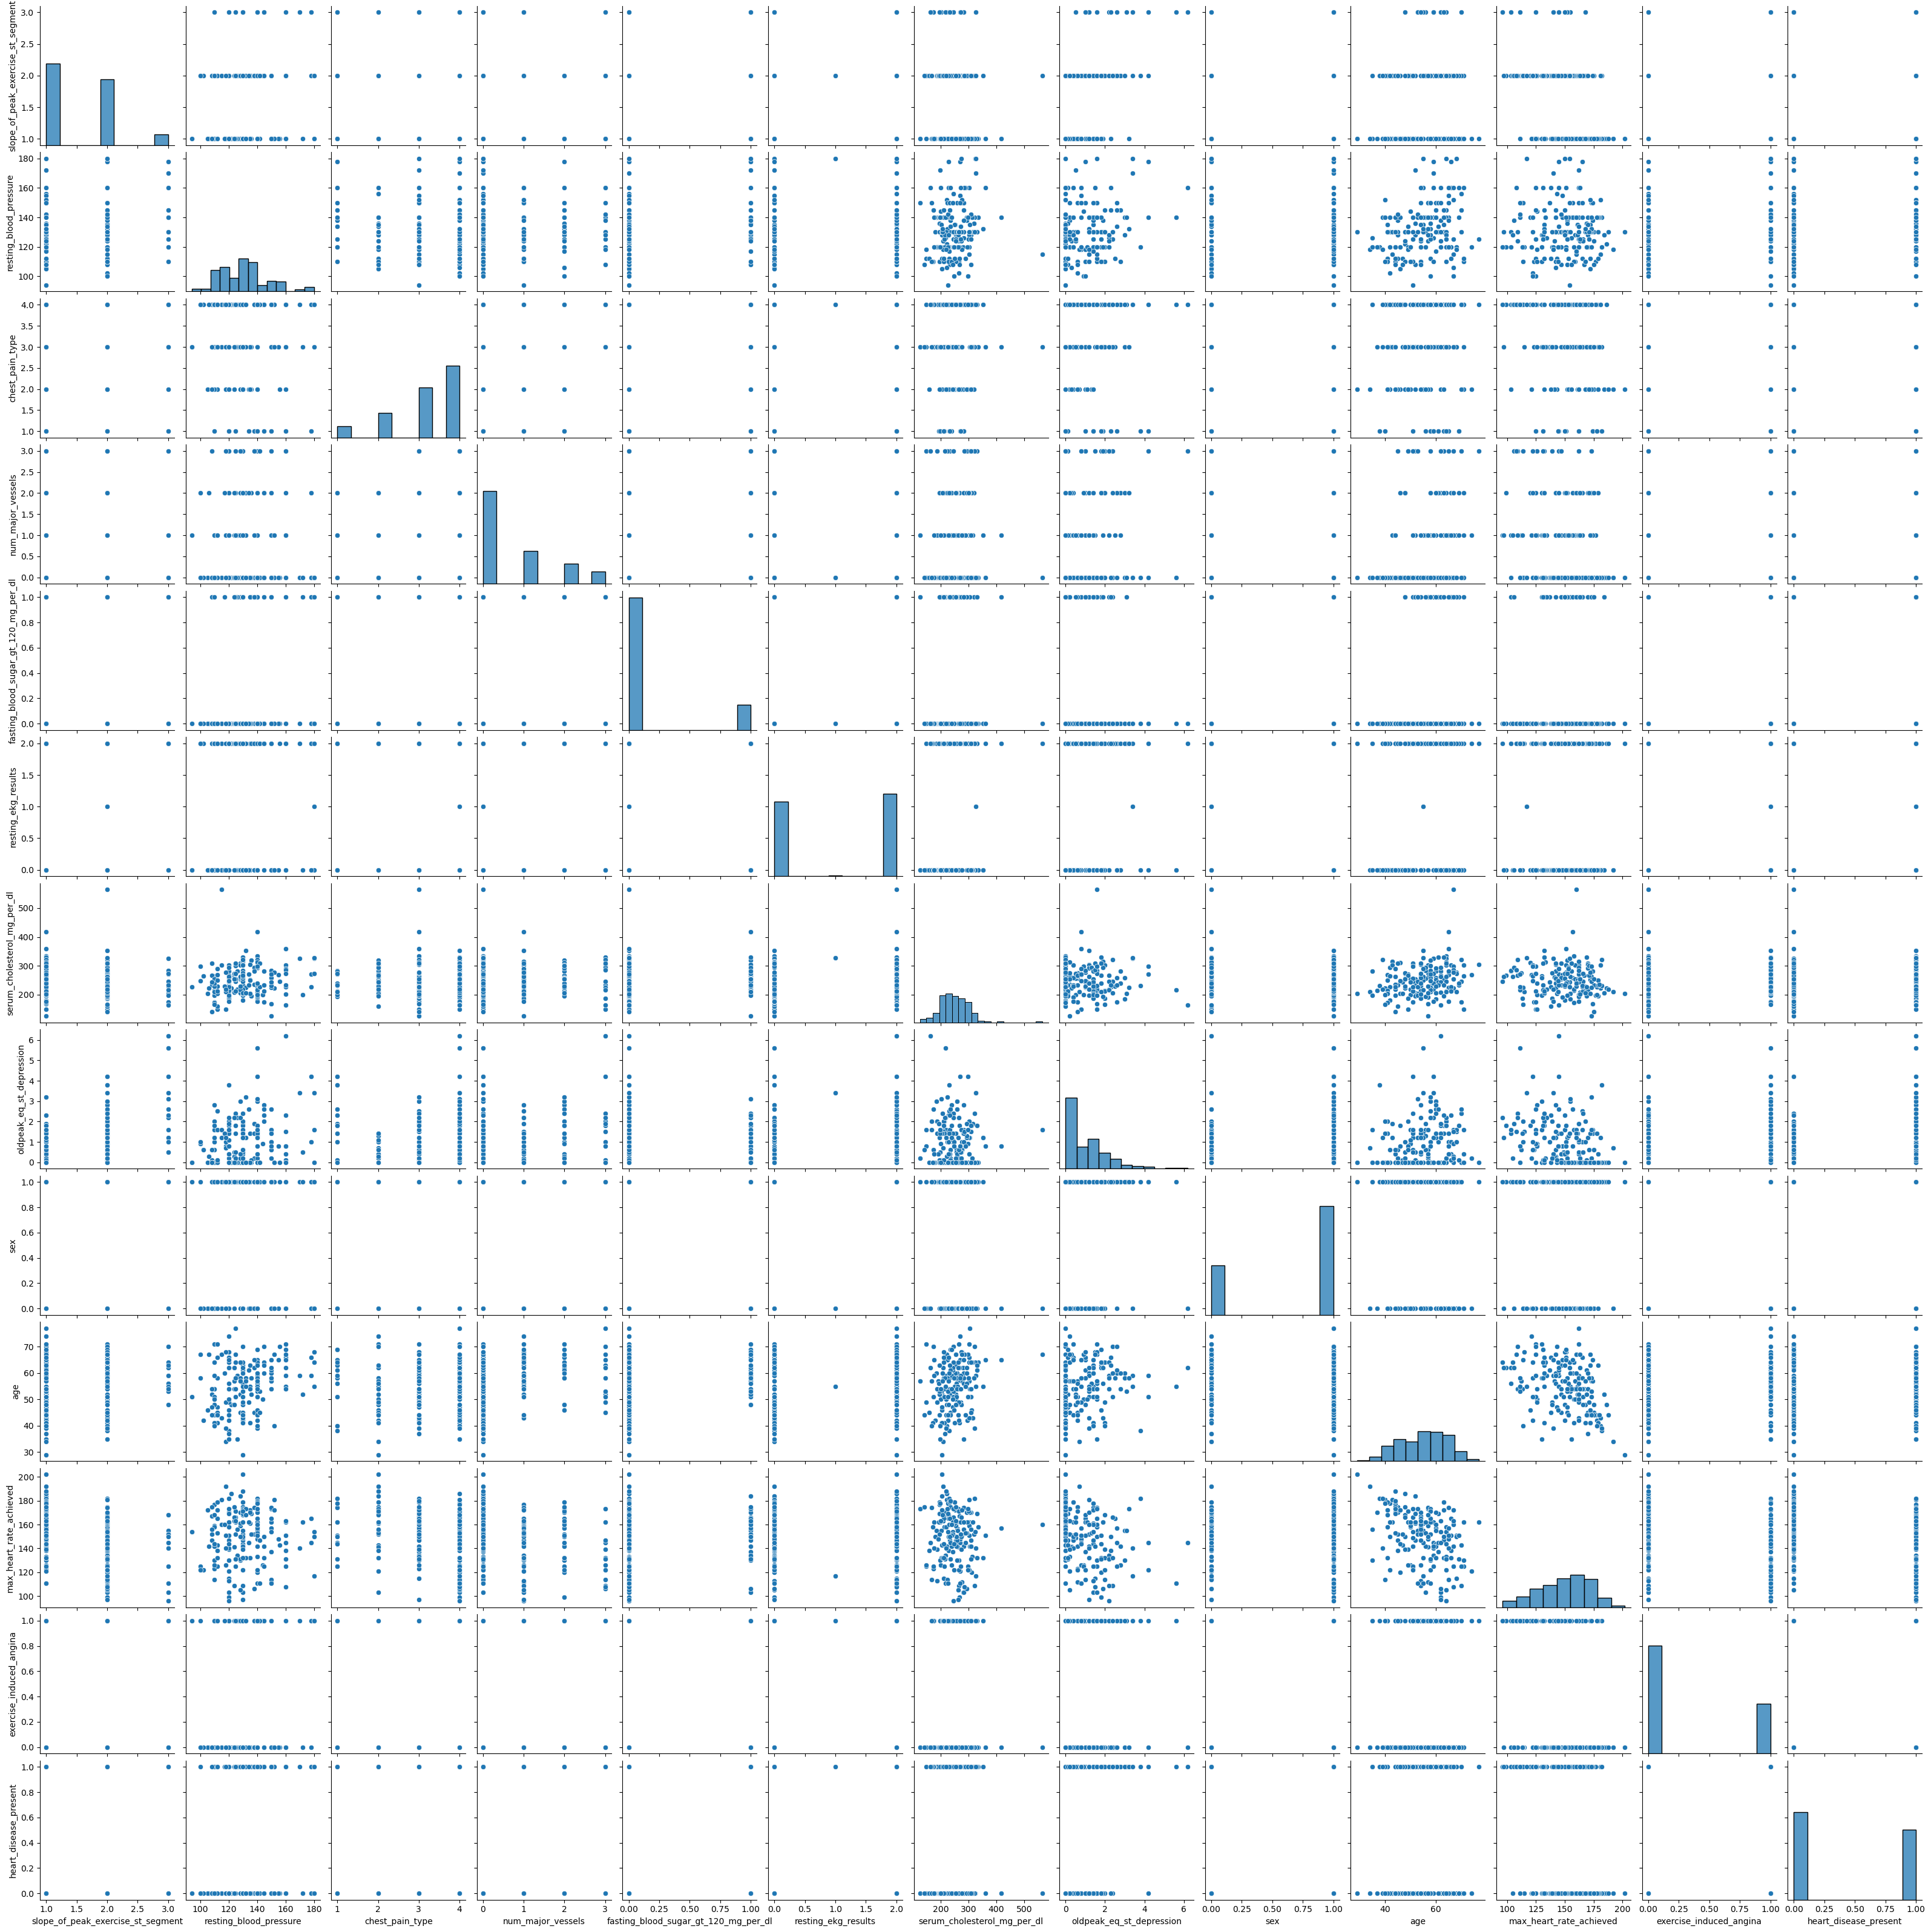

In [59]:
#Multii variate analysis
sns.pairplot(data=data)
plt.show()

#### INSIGHTS FROM EDA

### Data Preprocessing

In [63]:
data.columns

Index(['slope_of_peak_exercise_st_segment', 'thal', 'resting_blood_pressure',
       'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina',
       'heart_disease_present'],
      dtype='object')

In [65]:
data = data.drop( 'fasting_blood_sugar_gt_120_mg_per_dl', axis=1)

In [67]:
data #to check whether it is dropped or not

slope_of_peak_exercise_st_segment               thal  \
0                                    1             normal   
1                                    2             normal   
2                                    1             normal   
3                                    1  reversible_defect   
4                                    3  reversible_defect   
..                                 ...                ...   
175                                  2  reversible_defect   
176                                  2             normal   
177                                  2  reversible_defect   
178                                  1             normal   
179                                  1             normal   

     resting_blood_pressure  chest_pain_type  num_major_vessels  \
0                       128                2                  0   
1                       110                3                  0   
2                       125                4                  3   
3                       152                4                  0   
4                       178                1                  0   
..                      ...              ...                ...   
175                     125                4                  2   
176                     180                4                  0   
177                     125                3                  0   
178                     124                3                  2   
179                     160                3                  1   

     resting_ekg_results  serum_cholesterol_mg_per_dl  \
0                      2                          308   
1                      0                          214   
2                      2                          304   
3                      0                          223   
4                      2                          270   
..                   ...                          ...   
175                    0                          254   
176                    1                          327   
177                    0                          309   
178                    0                          255   
179                    0                          201   

     oldpeak_eq_st_depression  sex  age  max_heart_rate_achieved  \
0                         0.0    1   45                      170   
1                         1.6    0   54                      158   
2                         0.0    1   77                      162   
3                         0.0    1   40                      181   
4                         4.2    1   59                      145   
..                        ...  ...  ...                      ...   
175                       0.2    1   67                      163   
176                       3.4    0   55                      117   
177                       1.8    1   64                      131   
178                       0.0    1   48                      175   
179                       0.0    0   54                      163   

     exercise_induced_angina  heart_disease_present  
0                          0                      0  
1                          0                      0  
2                          1                      1  
3                          0                      1  
4                          0                      0  
..                       ...                    ...  
175                        0                      1  
176                        1                      1  
177                        1                      1  
178                        0                      0  
179                        0                      0  

[180 rows x 13 columns]

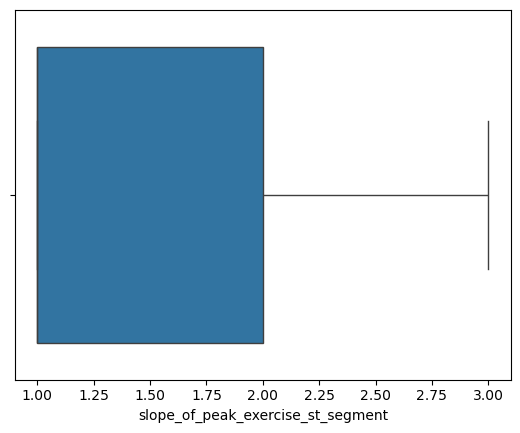

In [69]:
# Checking outliers for numerical columns
sns.boxplot(x=data.slope_of_peak_exercise_st_segment,orient='h')
plt.show()

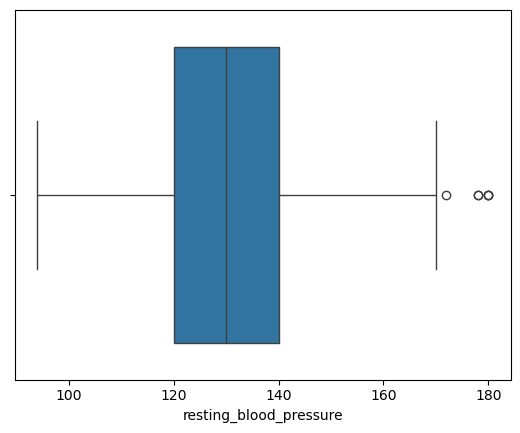

In [71]:
# Checking outliers for numerical columns
sns.boxplot(x=data.resting_blood_pressure,orient='h')
plt.show()

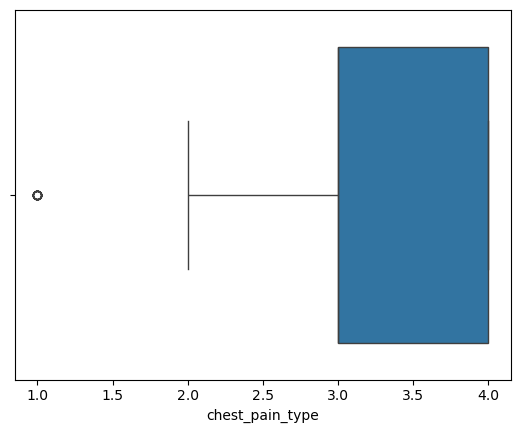

In [73]:
# Checking outliers for numerical columns
sns.boxplot(x=data.chest_pain_type,orient='h')
plt.show()

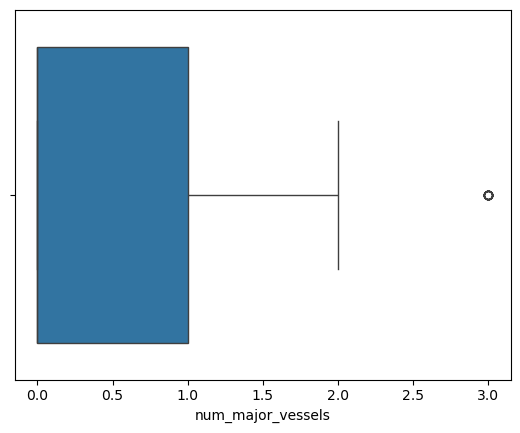

In [75]:
# Checking outliers for numerical columns
sns.boxplot(x=data.num_major_vessels,orient='h')
plt.show()

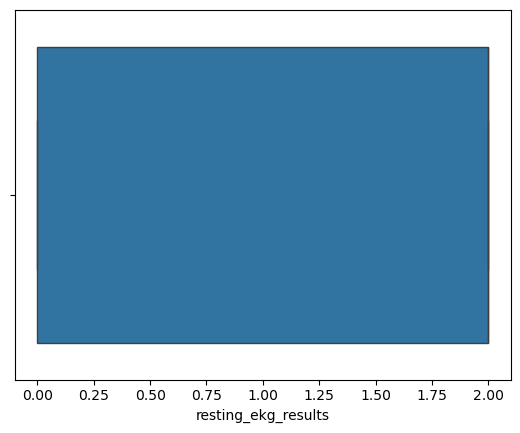

In [77]:
sns.boxplot(x=data.resting_ekg_results,orient='h')
plt.show()

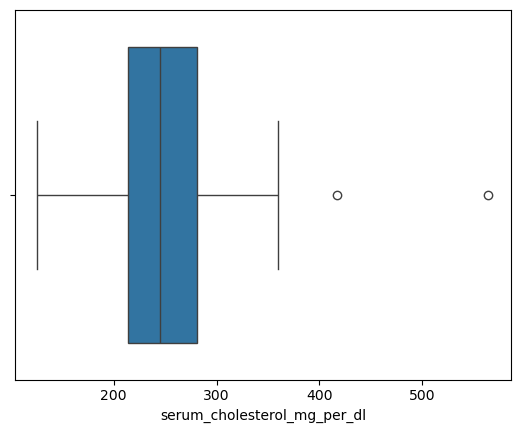

In [79]:
sns.boxplot(x=data.serum_cholesterol_mg_per_dl,orient='h')
plt.show()

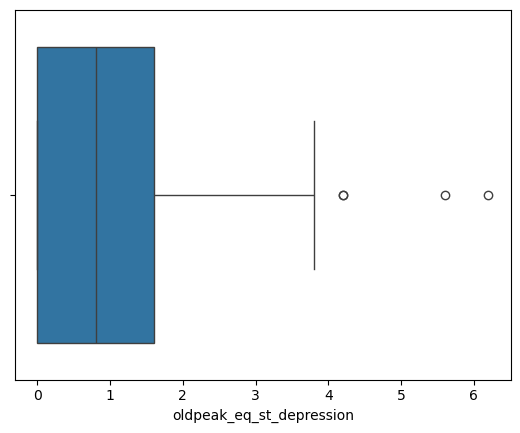

In [81]:
sns.boxplot(x=data.oldpeak_eq_st_depression,orient='h')
plt.show()

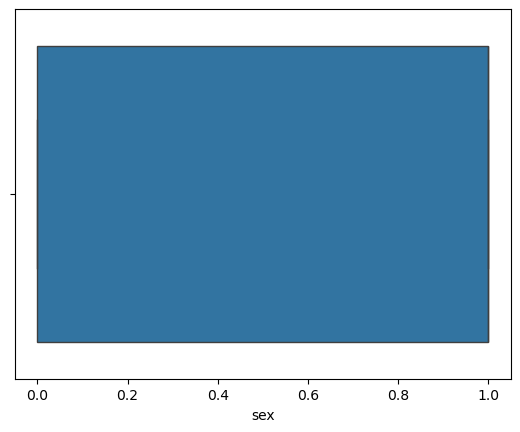

In [83]:
sns.boxplot(x=data.sex,orient='h')
plt.show()

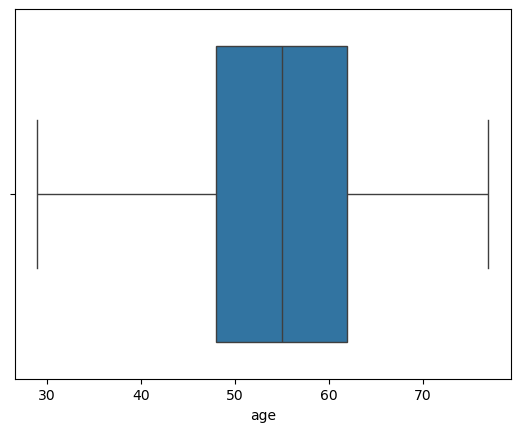

In [85]:
sns.boxplot(x=data.age,orient='h')
plt.show()

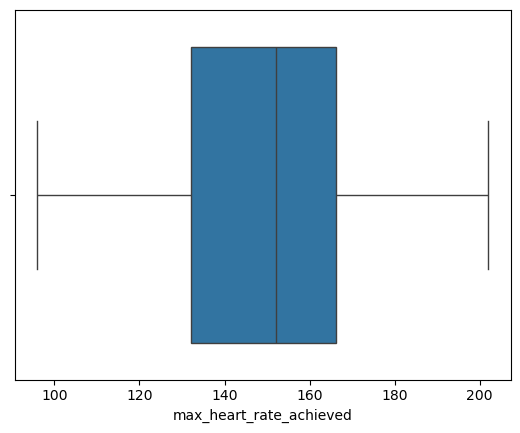

In [87]:
sns.boxplot(x=data.max_heart_rate_achieved,orient='h')
plt.show()

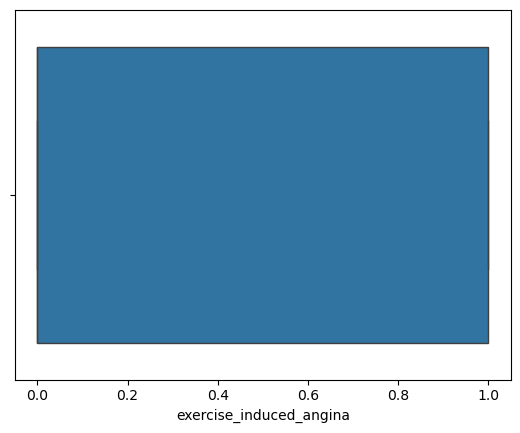

In [89]:
sns.boxplot(x=data.exercise_induced_angina,orient='h')
plt.show()

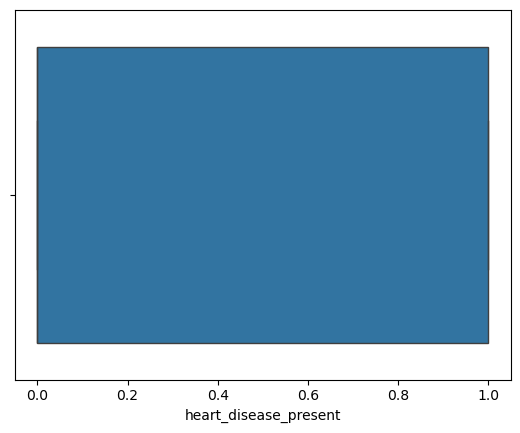

In [91]:
sns.boxplot(x=data.heart_disease_present,orient='h')
plt.show()

#### Handling Outliers

In [94]:
#Calculate Quartiles
Q1 = data['oldpeak_eq_st_depression'].quantile(0.25)
Q3 = data['oldpeak_eq_st_depression'].quantile(0.75)

In [96]:
#Calculate IQR
IQR = Q3 - Q1
IQR

1.6

In [98]:
#define lower and upper bounds
lower_bound = Q1 - 1.5 *IQR
upper_bound = Q3 + 1.5 *IQR
print(lower_bound)
print(upper_bound)

-2.4000000000000004
4.0


In [100]:
#Remove Outliers
data = data[(data['oldpeak_eq_st_depression']>=lower_bound) & (data['oldpeak_eq_st_depression']<=upper_bound)]

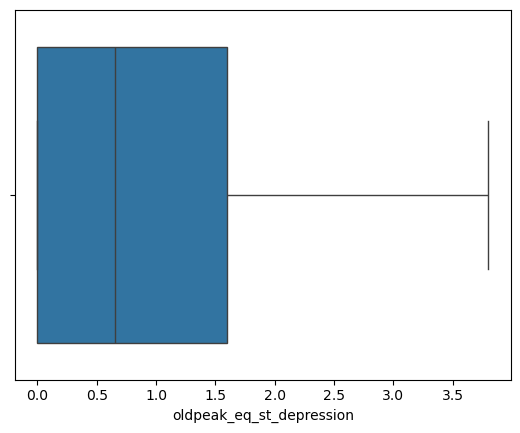

In [102]:
sns.boxplot(x=data.oldpeak_eq_st_depression,orient='h')
plt.show()

In [104]:
#Calculate Quartiles
Q1 = data['serum_cholesterol_mg_per_dl'].quantile(0.25)
Q3 = data['serum_cholesterol_mg_per_dl'].quantile(0.75)

In [106]:
#Calculate IQR
IQR = Q3 - Q1
IQR

67.5

In [108]:
#define lower and upper bounds
lower_bound = Q1 - 1.5 *IQR
upper_bound = Q3 + 1.5 *IQR
print(lower_bound)
print(upper_bound)

112.5
382.5


In [110]:
#Remove Outliers
data = data[(data['serum_cholesterol_mg_per_dl']>=lower_bound) & (data['serum_cholesterol_mg_per_dl']<=upper_bound)]

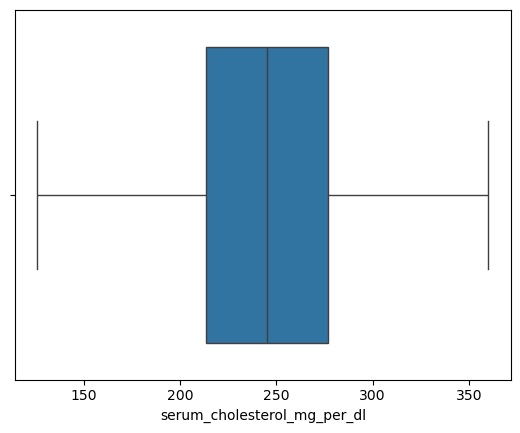

In [112]:
sns.boxplot(x=data.serum_cholesterol_mg_per_dl,orient='h')
plt.show()

In [114]:
#Calculate Quartiles
Q1 = data['resting_blood_pressure'].quantile(0.25)
Q3 = data['resting_blood_pressure'].quantile(0.75)

In [116]:
#Calculate IQR
IQR = Q3 - Q1
IQR

20.0

In [118]:
#define lower and upper bounds
lower_bound = Q1 - 1.5 *IQR
upper_bound = Q3 + 1.5 *IQR
print(lower_bound)
print(upper_bound)

90.0
170.0


In [120]:
#Remove Outliers
data = data[(data['resting_blood_pressure']>=lower_bound) & (data['resting_blood_pressure']<=upper_bound)]

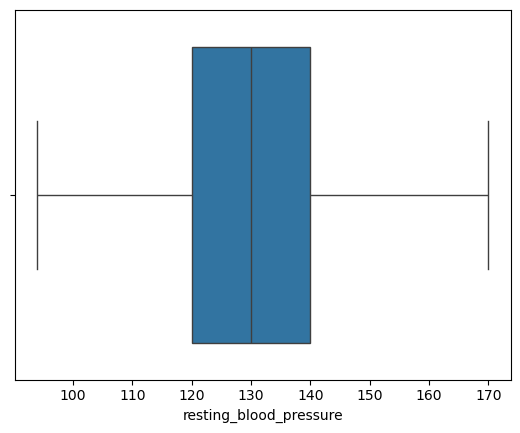

In [122]:
sns.boxplot(x=data.resting_blood_pressure,orient='h')
plt.show()

## Feature Engineering

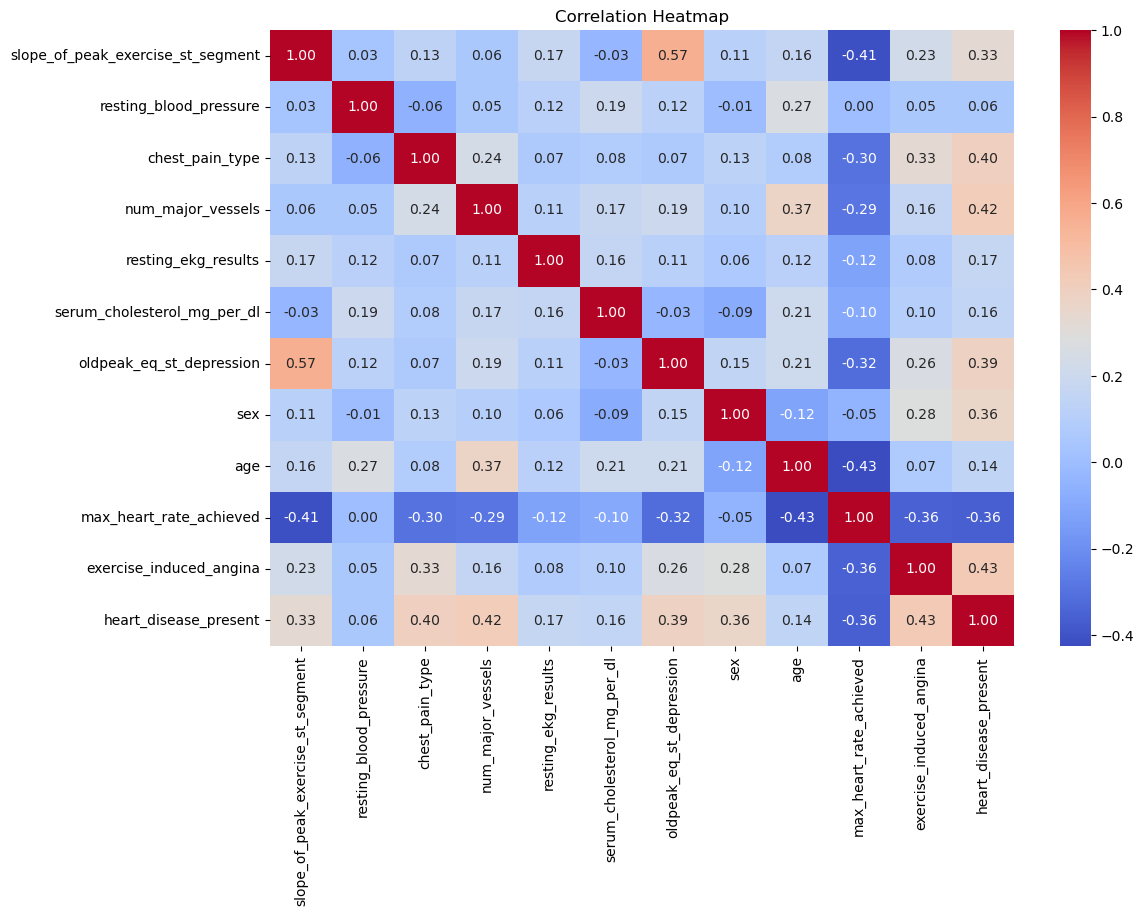

In [125]:
# Select numerical columns
numerical_data = data.select_dtypes(include=['float64', 'int64'])
# Calculate the correlation matrix
corr_matrix = numerical_data.corr()
# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")
plt.show()

In [126]:
#Find Correlations with the Target
target_corr = corr_matrix['heart_disease_present'].sort_values(ascending=False)
print("Correlations with target variable 'heart_disease_present':")
print(target_corr)

Correlations with target variable 'heart_disease_present':
heart_disease_present                1.000000
exercise_induced_angina              0.433095
num_major_vessels                    0.417095
chest_pain_type                      0.400550
oldpeak_eq_st_depression             0.386576
sex                                  0.363046
slope_of_peak_exercise_st_segment    0.329136
resting_ekg_results                  0.167919
serum_cholesterol_mg_per_dl          0.158959
age                                  0.144703
resting_blood_pressure               0.055380
max_heart_rate_achieved             -0.363598
Name: heart_disease_present, dtype: float64


In [129]:
# Find pairs with correlation > 0.8
high_corr = corr_matrix.abs().unstack().sort_values(ascending=False)
high_corr = high_corr[high_corr >= 0.8]  # Threshold for strong correlation
print("Highly correlated feature pairs:")
print(high_corr)

Highly correlated feature pairs:
slope_of_peak_exercise_st_segment  slope_of_peak_exercise_st_segment    1.0
resting_blood_pressure             resting_blood_pressure               1.0
exercise_induced_angina            exercise_induced_angina              1.0
max_heart_rate_achieved            max_heart_rate_achieved              1.0
age                                age                                  1.0
sex                                sex                                  1.0
oldpeak_eq_st_depression           oldpeak_eq_st_depression             1.0
serum_cholesterol_mg_per_dl        serum_cholesterol_mg_per_dl          1.0
resting_ekg_results                resting_ekg_results                  1.0
num_major_vessels                  num_major_vessels                    1.0
chest_pain_type                    chest_pain_type                      1.0
heart_disease_present              heart_disease_present                1.0
dtype: float64


In [131]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder,OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from category_encoders import BinaryEncoder
import pickle
from sklearn.pipeline import Pipeline

In [132]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

In [135]:
#Applying MinMax Scaler to num_major_vessels
data[['num_major_vessels']] =sc.fit_transform(data[['num_major_vessels']])                                                                                      
# Verify transformation                                                                                                                                                                                                                                          
print(data[['num_major_vessels']].head())

   num_major_vessels
0                0.0
1                0.0
2                1.0
3                0.0
5                0.0


In [137]:
data.columns

Index(['slope_of_peak_exercise_st_segment', 'thal', 'resting_blood_pressure',
       'chest_pain_type', 'num_major_vessels', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina',
       'heart_disease_present'],
      dtype='object')

In [139]:
#The columns are given to the encoders and scalers accordingly
standard_scaler = ['age', 'serum_cholesterol_mg_per_dl','resting_blood_pressure',
      'max_heart_rate_achieved','oldpeak_eq_st_depression','num_major_vessels']
frequency_encoder = ['thal']
passthrough = ['slope_of_peak_exercise_st_segment', 
       'chest_pain_type', 'resting_ekg_results','sex','exercise_induced_angina'] 

In [141]:
class FrequencyEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, column):
        self.column = column
        self.mapping = {}
    def fit(self, X, y=None):
        # Calculate frequency encoding mapping for the column
        value_counts = X[self.column].value_counts()
        sorted_values = sorted(value_counts.items(), key=lambda x: x[1])
        self.mapping = {value: idx for idx, (value, _) in enumerate(sorted_values)}
        return self
    def transform(self, X):
        # Apply frequency encoding based on the fitted mapping
        X_encoded = X.copy()
        X_encoded[self.column] = X_encoded[self.column].map(self.mapping)
        return X_encoded

In [143]:
def same(x):
    return x

In [145]:
no_trans=FunctionTransformer(same)

In [147]:
# Define the column transformer 
preprocessor = ColumnTransformer([
    ("Standard_scaler", MinMaxScaler(), standard_scaler),
    ("Frequency_encoder_thal", FrequencyEncoder(column="thal"), ['thal']),
    ('Pass_through',no_trans,passthrough)
])

In [149]:
# Fit and transform the data
transformed_data = preprocessor.fit_transform(data)
# Print transformed data
print("Transformed data shape:", transformed_data.shape)
print("Preview of transformed data:")
print(transformed_data[:5])

Transformed data shape: (169, 12)
Preview of transformed data:
[[0.33333333 0.77777778 0.44736842 0.69811321 0.         0.
  2.         1.         2.         2.         1.         0.        ]
 [0.52083333 0.37606838 0.21052632 0.58490566 0.42105263 0.
  2.         2.         3.         0.         0.         0.        ]
 [1.         0.76068376 0.40789474 0.62264151 0.         1.
  2.         1.         4.         2.         1.         1.        ]
 [0.22916667 0.41452991 0.76315789 0.80188679 0.         0.
  1.         1.         4.         0.         1.         0.        ]
 [0.27083333 0.23076923 0.47368421 0.50943396 0.         0.
  2.         1.         3.         0.         1.         0.        ]]


In [151]:
preprocessor

ColumnTransformer(transformers=[('Standard_scaler', MinMaxScaler(),
                                 ['age', 'serum_cholesterol_mg_per_dl',
                                  'resting_blood_pressure',
                                  'max_heart_rate_achieved',
                                  'oldpeak_eq_st_depression',
                                  'num_major_vessels']),
                                ('Frequency_encoder_thal',
                                 FrequencyEncoder(column='thal'), ['thal']),
                                ('Pass_through',
                                 FunctionTransformer(func=<function same at 0x000001D43B7DFB00>),
                                 ['slope_of_peak_exercise_st_segment',
                                  'chest_pain_type', 'resting_ekg_results',
                                  'sex', 'exercise_induced_angina'])])

In [153]:
# Fit and transform the data using the preprocessor
transformed_data = preprocessor.fit_transform(data)
# Print the transformed data
print(transformed_data)

[[0.33333333 0.77777778 0.44736842 ... 2.         1.         0.        ]
 [0.52083333 0.37606838 0.21052632 ... 0.         0.         0.        ]
 [1.         0.76068376 0.40789474 ... 2.         1.         1.        ]
 ...
 [0.72916667 0.78205128 0.40789474 ... 0.         1.         1.        ]
 [0.39583333 0.55128205 0.39473684 ... 0.         1.         0.        ]
 [0.52083333 0.32051282 0.86842105 ... 0.         0.         0.        ]]


In [155]:
for name, transformer, columns in preprocessor.transformers_:
    print(f"Transformer: {name}, Columns: {columns}")

Transformer: Standard_scaler, Columns: ['age', 'serum_cholesterol_mg_per_dl', 'resting_blood_pressure', 'max_heart_rate_achieved', 'oldpeak_eq_st_depression', 'num_major_vessels']
Transformer: Frequency_encoder_thal, Columns: ['thal']
Transformer: Pass_through, Columns: ['slope_of_peak_exercise_st_segment', 'chest_pain_type', 'resting_ekg_results', 'sex', 'exercise_induced_angina']
Transformer: remainder, Columns: [12]


In [157]:
# Print a preview of the transformed data
print("Preview of transformed data:")
print(transformed_data[:5])  # Show first 5 rows
# Check data type of transformed_data
if isinstance(transformed_data, np.ndarray):
    print("Data is encoded: Transformed data is a NumPy array.")
else:
    print("Data is not properly encoded.")
# Verify specific transformations
for name, transformer, columns in preprocessor.transformers_:
    print(f"Transformer: {name}, Applied on Columns: {columns}")

Preview of transformed data:
[[0.33333333 0.77777778 0.44736842 0.69811321 0.         0.
  2.         1.         2.         2.         1.         0.        ]
 [0.52083333 0.37606838 0.21052632 0.58490566 0.42105263 0.
  2.         2.         3.         0.         0.         0.        ]
 [1.         0.76068376 0.40789474 0.62264151 0.         1.
  2.         1.         4.         2.         1.         1.        ]
 [0.22916667 0.41452991 0.76315789 0.80188679 0.         0.
  1.         1.         4.         0.         1.         0.        ]
 [0.27083333 0.23076923 0.47368421 0.50943396 0.         0.
  2.         1.         3.         0.         1.         0.        ]]
Data is encoded: Transformed data is a NumPy array.
Transformer: Standard_scaler, Applied on Columns: ['age', 'serum_cholesterol_mg_per_dl', 'resting_blood_pressure', 'max_heart_rate_achieved', 'oldpeak_eq_st_depression', 'num_major_vessels']
Transformer: Frequency_encoder_thal, Applied on Columns: ['thal']
Transformer: Pas

In [159]:
import pickle   # For saving and loading machine learning models
from sklearn.model_selection import train_test_split  # For splitting the data into training and testing
from preprocessor import *  # To import all preprocessor functions at once
from imblearn.over_sampling import SMOTE  # For balancing the data
import warnings

In [160]:
#checking the skewness so that we can apply for transformations
from scipy.stats import skew
numerical_columns = ['slope_of_peak_exercise_st_segment', 'resting_blood_pressure',
       'chest_pain_type', 'num_major_vessels', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina',
       'heart_disease_present']
for col in numerical_columns:
    print(f"{col}: Skewness = {skew(data[col], nan_policy='omit')}")

slope_of_peak_exercise_st_segment: Skewness = 0.6720988457916757
resting_blood_pressure: Skewness = 0.2639220197613653
chest_pain_type: Skewness = -0.802327978629856
num_major_vessels: Skewness = 1.1581523317654634
resting_ekg_results: Skewness = -0.10666022920649494
serum_cholesterol_mg_per_dl: Skewness = 0.010256867327428178
oldpeak_eq_st_depression: Skewness = 0.7951280690221324
sex: Skewness = -0.8945211385019869
age: Skewness = -0.14569598465086608
max_heart_rate_achieved: Skewness = -0.39372956048350677
exercise_induced_angina: Skewness = 0.8636717432141608
heart_disease_present: Skewness = 0.25046187774756545


### Task 2:- Create a model predicting potential Heart Diseases in people using Machine Learning algorithms.

### Model Building

In [165]:
# Final feature set
X = data.drop('heart_disease_present', axis=1)  # Features
y = data['heart_disease_present']  # Target

In [167]:
# Spliting the data into train and test
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=33)

In [169]:
print(x_train.columns)

Index(['slope_of_peak_exercise_st_segment', 'thal', 'resting_blood_pressure',
       'chest_pain_type', 'num_major_vessels', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina'],
      dtype='object')


In [171]:
# Transform the training data using the preprocessor object or PipeLine
processed_x_train = preprocessor.fit_transform(x_train)
processed_x_test = preprocessor.fit_transform(x_test)

In [173]:
from sklearn.utils.class_weight import compute_sample_weight
sample_weights = compute_sample_weight(class_weight={0:1,1:5},y=y_train)  # You need to define this function
# based on weights the inputs are given preference, hightest weight hightest preference
# while in y=mx+c
# m represents slope where as here we consider it as weight
# smote technique can also be used
# the ratios may differ

In [175]:
import time
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_sample_weight

### 1. Logistic Regression

In [178]:
from sklearn.model_selection import GridSearchCV
log_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'lbfgs']  # Optimization algorithms
}

log_grid = GridSearchCV(LogisticRegression(class_weight='balanced', random_state=42), 
                        log_param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)

log_grid.fit(processed_x_train, y_train)

print("Best Parameters for Logistic Regression:", log_grid.best_params_)

# Train final Logistic Regression model
best_log_model = LogisticRegression(**log_grid.best_params_, class_weight='balanced', random_state=42)
best_log_model.fit(processed_x_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters for Logistic Regression: {'C': 0.1, 'solver': 'liblinear'}


LogisticRegression(C=0.1, class_weight='balanced', random_state=42,
                   solver='liblinear')

In [179]:
# Train Logistic Regression with Best Parameters
best_log_model = LogisticRegression(C=100, solver='lbfgs', class_weight='balanced', random_state=42)
best_log_model.fit(processed_x_train, y_train)

LogisticRegression(C=100, class_weight='balanced', random_state=42)

In [182]:
y_predict = best_log_model.predict(processed_x_test)

In [184]:
y_predict

array([1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
      dtype=int64)

 Logistic Regression Accuracy: 0.8837209302325582

 Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.93      0.89      0.91        28
           1       0.81      0.87      0.84        15

    accuracy                           0.88        43
   macro avg       0.87      0.88      0.87        43
weighted avg       0.89      0.88      0.88        43



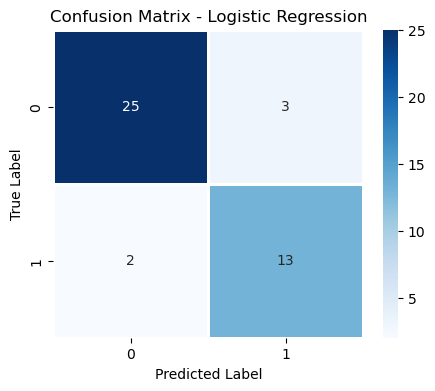

In [186]:
# Now, Evaluate Model Performance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Calculate Accuracy
log_accuracy = accuracy_score(y_test, y_predict)
print(" Logistic Regression Accuracy:", log_accuracy)
#  Print Classification Report
print("\n Classification Report for Logistic Regression:")
print(classification_report(y_test, y_predict))
#  Plot Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True, fmt='d', cmap='Blues', linewidths=1)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

### 2. Decision Tree

In [189]:
# Define Hyperparameters for Decision Tree
dt_param_grid = {
    'max_depth': [3, 5, 10, None],
    'criterion': ['gini', 'entropy']
}
# Train Decision Tree with GridSearchCV
dt_grid = GridSearchCV(DecisionTreeClassifier(class_weight='balanced', random_state=42),
                       dt_param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)
dt_grid.fit(processed_x_train, y_train)
print("Best Parameters for Decision Tree:", dt_grid.best_params_)
# Train Final Decision Tree Model
best_dt_model = DecisionTreeClassifier(**dt_grid.best_params_, class_weight='balanced', random_state=42)
best_dt_model.fit(processed_x_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 10}


DecisionTreeClassifier(class_weight='balanced', max_depth=10, random_state=42)

In [191]:
# Predict
y_pred_dt = best_dt_model.predict(processed_x_test)
y_pred_dt

array([0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
      dtype=int64)

 Decision Tree Accuracy: 0.6511627906976745

 Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.74      0.71      0.73        28
           1       0.50      0.53      0.52        15

    accuracy                           0.65        43
   macro avg       0.62      0.62      0.62        43
weighted avg       0.66      0.65      0.65        43



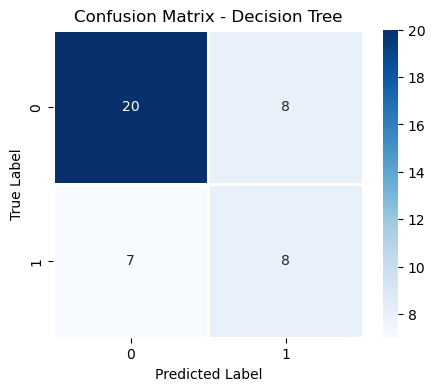

In [193]:
# Evaluate Decision Tree
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print(" Decision Tree Accuracy:", dt_accuracy)
print("\n Classification Report for Decision Tree:")
print(classification_report(y_test, y_pred_dt))

# Plot Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Blues', linewidths=1)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Decision Tree")
plt.show()

### 3. Random Forest

In [196]:
# Define Hyperparameters for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20]
}
# Train Random Forest with GridSearchCV
rf_grid = GridSearchCV(RandomForestClassifier(class_weight='balanced', random_state=42),
                       rf_param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)
rf_grid.fit(processed_x_train, y_train)
print("Best Parameters for Random Forest:", rf_grid.best_params_)
# Train Final Random Forest Model
best_rf_model = RandomForestClassifier(**rf_grid.best_params_, class_weight='balanced', random_state=42)
best_rf_model.fit(processed_x_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
Best Parameters for Random Forest: {'max_depth': None, 'n_estimators': 200}


RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

In [197]:
# Predict
y_pred_rf = best_rf_model.predict(processed_x_test)
y_pred_rf

array([1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
      dtype=int64)

 Random Forest Accuracy: 0.8372093023255814

 Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.89      0.86      0.87        28
           1       0.75      0.80      0.77        15

    accuracy                           0.84        43
   macro avg       0.82      0.83      0.82        43
weighted avg       0.84      0.84      0.84        43



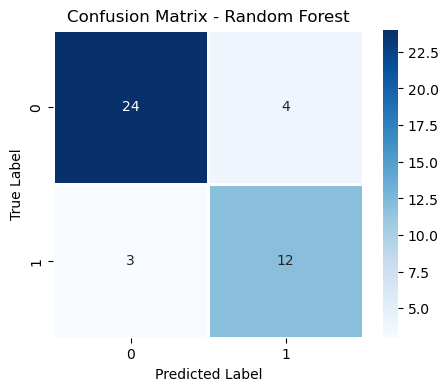

In [198]:
# Evaluate Random Forest
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(" Random Forest Accuracy:", rf_accuracy)
print("\n Classification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))

# Plot Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues', linewidths=1)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Random Forest")
plt.show()

### 4. Gradient Boosting

In [203]:
# Define Hyperparameters for Gradient Boosting
gb_param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1]
}
# Train Gradient Boosting with GridSearchCV
gb_grid = GridSearchCV(GradientBoostingClassifier(random_state=42),
                       gb_param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)
gb_grid.fit(processed_x_train, y_train)
print("Best Parameters for Gradient Boosting:", gb_grid.best_params_)
# Train Final Gradient Boosting Model
best_gb_model = GradientBoostingClassifier(**gb_grid.best_params_, random_state=42)
best_gb_model.fit(processed_x_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best Parameters for Gradient Boosting: {'learning_rate': 0.01, 'n_estimators': 50}


GradientBoostingClassifier(learning_rate=0.01, n_estimators=50, random_state=42)

In [204]:
# Predict
y_pred_gb = best_gb_model.predict(processed_x_test)
y_pred_gb

array([0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0],
      dtype=int64)

 Gradient Boosting Accuracy: 0.7906976744186046

 Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84        28
           1       0.71      0.67      0.69        15

    accuracy                           0.79        43
   macro avg       0.77      0.76      0.77        43
weighted avg       0.79      0.79      0.79        43



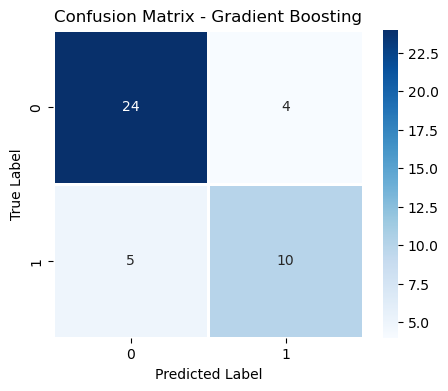

In [207]:
# Evaluate Gradient Boosting
gb_accuracy = accuracy_score(y_test, y_pred_gb)
print(" Gradient Boosting Accuracy:", gb_accuracy)
print("\n Classification Report for Gradient Boosting:")
print(classification_report(y_test, y_pred_gb))

# Plot Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_gb), annot=True, fmt='d', cmap='Blues', linewidths=1)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Gradient Boosting")
plt.show()

### 5.XgBoost

In [210]:
## model creation
from xgboost import XGBClassifier#importing the model library
xgb_r=XGBClassifier() ## object creation
xgb_r.fit(processed_x_train,y_train,sample_weight=sample_weights)# fitting the data
y_hat=xgb_r.predict(processed_x_test)

 XGBoost Accuracy: 0.7907

 Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.85      0.82      0.84        28
           1       0.69      0.73      0.71        15

    accuracy                           0.79        43
   macro avg       0.77      0.78      0.77        43
weighted avg       0.79      0.79      0.79        43



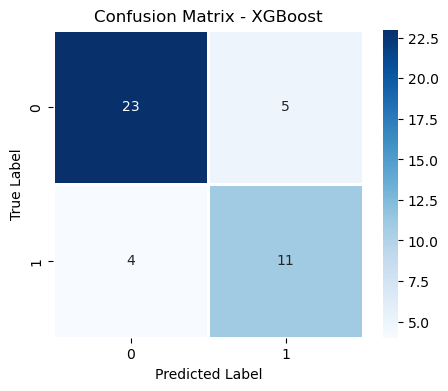

In [212]:
## Model Evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Calculate Accuracy
xgb_accuracy = accuracy_score(y_test, y_hat)
print(f" XGBoost Accuracy: {xgb_accuracy:.4f}")
#  Print Classification Report
print("\n Classification Report for XGBoost:")
print(classification_report(y_test, y_hat))
#  Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_hat), annot=True, fmt='d', cmap='Blues', linewidths=1)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - XGBoost")
plt.show()

### 6.SVM

In [215]:
from sklearn.svm import SVC
# Define Hyperparameters for SVM
svm_param_grid = {
    'C': [0.1, 1],  # Regularization parameter
    'kernel': ['linear'],  # Kernel types
    'gamma': ['scale', 'auto']  # Kernel coefficient
}

# Train SVM with GridSearchCV
svm_grid = GridSearchCV(SVC(random_state=42),
                        svm_param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)
svm_grid.fit(processed_x_train, y_train)
print("Best Parameters for SVM:", svm_grid.best_params_)
# Train Final SVM Model
best_svm_model = SVC(**svm_grid.best_params_, random_state=42)
best_svm_model.fit(processed_x_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best Parameters for SVM: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}


SVC(C=0.1, kernel='linear', random_state=42)

In [217]:
# Predict
y_pred_svm = best_svm_model.predict(processed_x_test)
y_pred_svm

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0],
      dtype=int64)

SVM Accuracy: 0.7674418604651163

Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.85      0.79      0.81        28
           1       0.65      0.73      0.69        15

    accuracy                           0.77        43
   macro avg       0.75      0.76      0.75        43
weighted avg       0.78      0.77      0.77        43



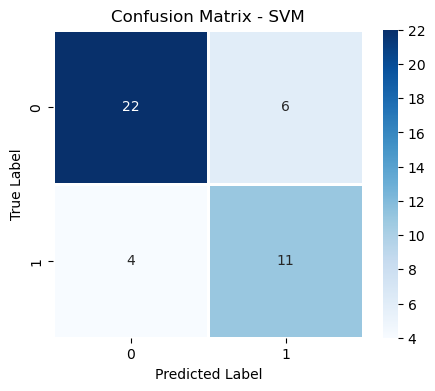

In [219]:
# Evaluate SVM
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", svm_accuracy)
print("\nClassification Report for SVM:")
print(classification_report(y_test, y_pred_svm))

# Plot Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Blues', linewidths=1)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - SVM")
plt.show()

### MODEL COMPARISION


 Model Performance Comparison:
Logistic Regression: 0.8837
Random Forest: 0.8372
Gradient Boosting: 0.7907
XGBoost: 0.7907
SVM: 0.7674
Decision Tree: 0.6512


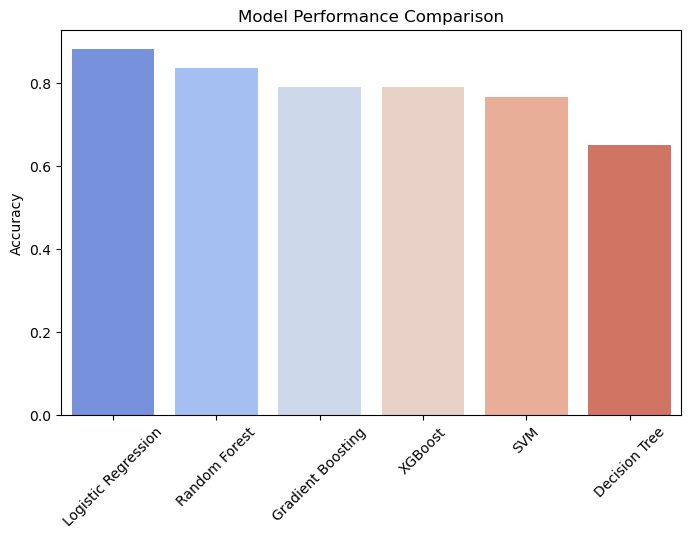

In [222]:
# Store model results
model_results = {
    "Logistic Regression": log_accuracy,
    "Decision Tree": dt_accuracy,
    "Random Forest": rf_accuracy,
    "Gradient Boosting": gb_accuracy,
    "XGBoost": xgb_accuracy,
    "SVM": svm_accuracy
}

# Sort models by accuracy
sorted_results = sorted(model_results.items(), key=lambda x: x[1], reverse=True)
print("\n Model Performance Comparison:")
for model, acc in sorted_results:
    print(f"{model}: {acc:.4f}")

# Plot Model Comparison
plt.figure(figsize=(8, 5))
sns.barplot(x=[m[0] for m in sorted_results], y=[m[1] for m in sorted_results], palette="coolwarm")
plt.xticks(rotation=45)
plt.ylabel("Accuracy")
plt.title("Model Performance Comparison")
plt.show()

## MODEL PERFORMANCE REPORT

## Task3:-Suggestions to the Hospital  to awake the predictions of heart diseases  prevent life threats.

## Report on Challenges faced